<a href="https://colab.research.google.com/github/victorlima090/imersaoDados/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import re
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)


In [18]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [19]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
954,Rua Araporé,Jardim Guedala,São Paulo,443,4,4,7,R$ 2.300.000
8009,Rua Jabebira,Jardim Everest,São Paulo,755,5,9,4,R$ 8.000.000
2401,NaN,Caxingui,São Paulo,800,4,4,8,R$ 20.000\n /Mês
8367,NaN,Jardim das Vertentes,São Paulo,150,3,4,3,R$ 850.000
106,Rua Coronel Octávio Azeredo,Vila Mazzei,São Paulo,80,3,1,2,R$ 420.000
8865,Rua Pantojo,Vila Regente Feijó,São Paulo,354,3,1,2,R$ 1.277.250
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
7309,NaN,Cidade Jardim,São Paulo,414,4,1,4,R$ 4.500.000
4026,Rua Coronel Artur Godoi,Vila Mariana,São Paulo,245,3,3,3,R$ 4.500.000
4428,Rua Anunze,Boaçava,São Paulo,415,3,5,4,R$ 4.300.000


In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [21]:
dados["Bairro"][6522]

'Vila Paulo Silas'

In [22]:
dados.Metragem.mean()

442.30065947242207

In [23]:
dados["Metragem"].mean()

442.30065947242207

In [24]:
sum((dados["Bairro"] == "Vila Mariana"))

184

In [25]:
tem_imoveis_vila =( dados["Bairro"] == "Vila Mariana")
tem_imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [26]:
imoveis_vila_mariana = dados[tem_imoveis_vila]
imoveis_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [27]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [28]:
dados["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

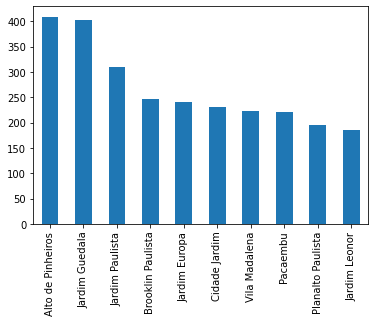

In [29]:
n_imoveis_bairro = dados["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

Desafios:

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

# Desafio 1

In [33]:
dados.groupby('Bairro')['Metragem'].mean()

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

# Desafio 2 - formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)

# Desafio 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão

In [94]:
def convert_values_to_number(value):
  value = value.replace(".",'')
  return int(re.findall(r'(\d+\.?)', value)[0])

In [96]:
dados['Valor'] = dados['Valor'].map(convert_values_to_number)

## Encontrando regiao com m2 mais caro

In [98]:
dados['Valor/m2'] = dados['Valor']/dados['Metragem']

In [118]:
bairro_mais_caro_por_m2 = dados.groupby('Bairro').mean().sort_values('Valor/m2', ascending=False)

### Media do valor do m2 por bairro

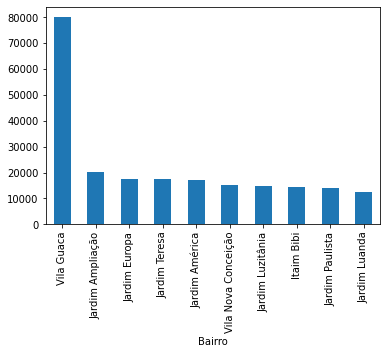

In [112]:
bairro_mais_caro_por_m2['Valor/m2'].head(10).plot.bar()

[Pergunta]Valor da Vila Guaca ta bem dispare do resto, seria um outlier ou realmente os valores desse bairro sao mais altos?

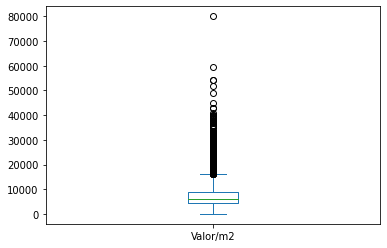

In [122]:
dados['Valor/m2'].plot.box()

In [123]:
dados[dados['Bairro'] == 'Vila Guaca']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,800000,80000.0


Realmente, esse valor ta bem longe do resto, além disso, como so tem um valor desse bairro, ele ta poluindo o resto das metricas. Vou analisar as coisas sem esse bairro

#### Os Vinte bairros com o valor medio do m2 mais alto



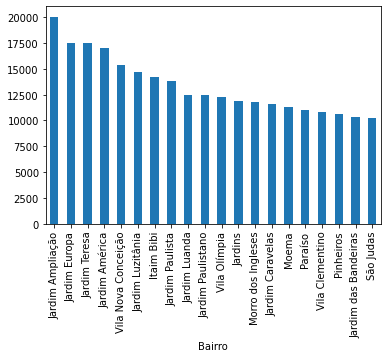

In [131]:
bairro_mais_caro_por_m2.iloc[1: , :]['Valor/m2'].head(20).plot.bar()

### Mediana do valor do R$ por bairro

In [132]:
bairro_mais_caro_por_m2_median = dados.groupby('Bairro').median().sort_values('Valor/m2', ascending=False)

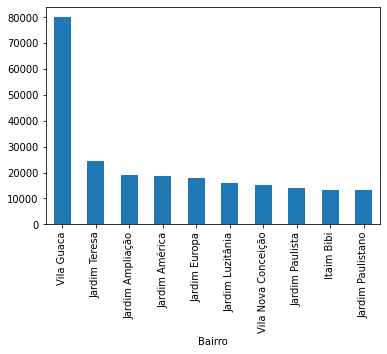

In [117]:
bairro_mais_caro_por_m2['Valor/m2'].head(10).plot.bar()

Como Foi visto antes, o bairro Via Guaca so tem 1 amostra e com o valor mais alto do dataset, então pra melhorar a visualização vou remove-lo da base

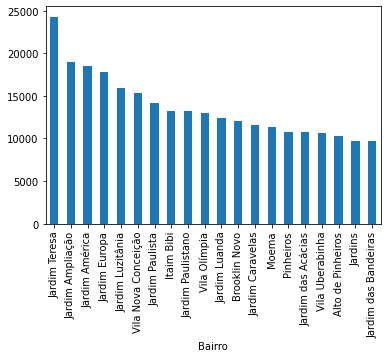

In [133]:
bairro_mais_caro_por_m2_median.iloc[1: , :]['Valor/m2'].head(20).plot.bar()

hmmm, bem caro viver nessa cidade. Como sera que isso é comparado com o resto do Brasil?[TODO]

# Desafio 4 - Pegar outros estatísticas dos dados, média, mediana, mim, max 

In [139]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor,Valor/m2
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04,10008.000000
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06,7326.232520
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06,5527.421382
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03,8.250000
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05,4242.424242
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06,6153.846154
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06,9047.619048
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07,80000.000000


# Desafio 5 - Descobrir quais são os bairros que não tem nome de Rua.

In [141]:
dados[dados['Rua'].isna()]['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

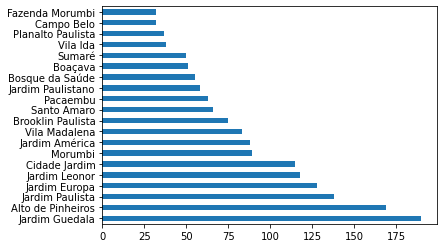

In [151]:
dados[dados['Rua'].isna()]['Bairro'].value_counts().head(20).plot.barh()